# Gradient descent introduction
[Hobbit village](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
sns.set()

Below one can find function plotting the village

In [ ]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

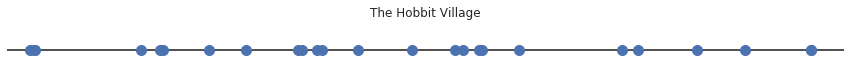

In [ ]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

The inhabitants of a one-dimensional village want to connect to the Internet, so they need a central service station from which a cable will stretch to all the houses in the village. Let the price of the cable to be pulled from the station to each house independently be determined by some function p(d) . Then it is clear that the village will have to pay the following amount for access to the World Wide Web:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
$w$ - station location, $x_i$ - location of $i$ house.

Write analytical solution $w^*$ for minimization $P(w,x)$, if $p(d) = d^2$

<font color="lime"> ==YOUR ANSWER== </font>

Write loss function $P(x,w)$

In [ ]:
def P(w, x):
    pass

Plot loss function on the range $(0, l)$

In [ ]:
### YOUR CODE

Write gradient of loss function

In [ ]:
def dP(w, x):
    pass

Plot gradient of loss function on the range $(0,l)$. Which point on the graph is of particular interest? Why?

In [ ]:
### YOUR CODE

Write function `gradient_descent`, which returns $w_k$ after a fixed number of steps.   

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    pass

Modify `gradient_descent` to return all optimization trajectory $(w_0, w_1, \ldots, w_k)$.
Plot loss function trajectory (Y axis - $f(w_k)$); X axis - $k$) for initial point $w_0 = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$.   
Draw conclusions.

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    pass

The village decided to lay cable using new technology. That's why the price of the cable changed to:

$$
p(d) = |d|
$$

Write new function `P`, `dP`. Plot graphs for various $x$ and $w$.

In [ ]:
def P(w, x):
    pass
    
def dP(w, x):
    pass

Write new analytical solytion $w^*$

<font color="lime"> ==YOUR ANSWER== </font>

Plot loss trajectory for new $p(d)$.

In [ ]:
### YOUR CODE

After several years, the goverment propose to destroy the first station but choose locations for two new stations. In this conditions cost of connecting all house calculated by new formula:

$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

Write new `P`, `dP`. 

In [ ]:
def P(w1, w2, x):
    pass

def dP(w1, w2, x):
    pass

Plot  $P(w_1, w_2), \|\nabla P(w_1, w_2)\|$ for different number of houses $N$. Comment on what happens as you increase $N$.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(10)
Ns = [10, 50, 500, 5000]
l = 1
for N in Ns:
    x = np.random.rand(N)*l
    w1 = np.linspace(0,l,200)
    w2 = np.linspace(0,l,200)

    p = np.zeros([w1.shape[0], w1.shape[0]])
    dp = np.zeros([w1.shape[0], w1.shape[0]])
    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j] = P(w1_, w2_, x)
            dp[i][j] = np.linalg.norm(dP(w1_, w2_, x))
            j += 1
        i += 1
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    f.set_size_inches(12, 5)
    f.suptitle('2 routers, $N = $'+str(N), fontsize=26)
    plt.show()

Write new `gradient_descent`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graph $P(w_1, w_2)$ or $\|\nabla P (w_1, w_2)\|$ that were above. To ease visualization try to use `ax.quiver`

In [ ]:
def gradient_descent(P, dP, w0, mu, Nsteps, plot = False):
    trajectory = [w0]
    ###
    ### Your code
    ###
    if plot:
        w1 = np.linspace(0,l,50)
        w2 = np.linspace(0,l,50)
        p = np.zeros([w1.shape[0], w1.shape[0]])

        i = 0
        for w1_ in w1:
            j = 0
            for w2_ in w2:
                p[i][j] = P(w1_, w2_, x)
                j += 1
            i += 1

        plt.figure(figsize=(11,11))
        plt.title('Gradient descent path ($\mu=$'+str(mu)+', $N=$'+str(N)+')', fontsize=26)
        plt.xlabel('$w_1$', fontsize=22)
        plt.ylabel('$w_2$', fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlim(-0.01,1.01)
        plt.ylim(-0.01,1.01)
        plt.contourf(w1, w2, p, cmap='viridis')
        plt.colorbar()

        w1s = [w[0] for w in trajectory]
        w2s = [w[1] for w in trajectory]
        plt.scatter(w1s, w2s, color='orange')
        plt.plot(w1s, w2s, color='red')

        plt.show()
    return trajectory

In [ ]:
### YOUR CODE
N = 2
x = np.random.rand(N)*l
gradient_descent(P, dP, (0.04,0.02), 0.001, 100, True)

# Extra: projected gradient descent

Construction is almost underway, but new safety regulations do not allow stations to be on the distance more than 1/2:
 
$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

Plot our feasible set. Is it convex?

In [ ]:
### YOUR CODE

Write `projected_SGD`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graphs $P$ and $\nabla P$ that were above.

The projected gradient descent method consists in making a gradient step and then checking if the obtained point belongs to the feasible set. If it belongs to the target set, the algorithm continues, otherwise a projection to the feasible set is made.

In [ ]:
def conditional_SGD(x, dP_sigma, w0, mu, Nsteps, p=0.4):
    pass

In [ ]:
def projection(w):
    pass

In [ ]:
### YOUR CODE

# Steepest gradient descent for hyperparameter search in Machine Learning.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 34s 5ms/step - loss: 0.3713 - accuracy: 0.8880 - val_loss: 0.0874 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 2s 5ms/step - loss: 0.1132 - accuracy: 0.9652 - val_loss: 0.0632 - val_accuracy: 0.9835
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0854 - accuracy: 0.9734 - val_loss: 0.0507 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.0493 - val_accuracy: 0.9865
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0417 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.0379 - val_accuracy: 0.9888
Epoch 7/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02343994379043579
Test accuracy: 0.9918000102043152


In this task you are to select any **single hyperparameter** (batchsize, learning rate, number of layers, number of neurons in a specific layer, dropout rate etc.) and any metric you want to maximize\minimize.

Use `minimize_scalar` from scipy to solve this task.

In [ ]:
def your_metric(hyperparameter):
    ###
    ### YOUR CODE
    ###
    return your_metric

from scipy.optimize import minimize_scalar
res = minimize_scalar(your_metric, bounds=(2, 256), method='bounded')